# Pharmaceuticals Study

##  Conclusions of 4 drugs on Tumor
### 1) effect on the tumor size: Capomulin seems to be effective in reducing the size of the tumor  over time, compared to other 2 drugs which shows almost no effect including placebo (37 mm3 vs over 65 mm3 at the end of the treatment period) 
### 2) effect on metastatic spread: all the 3 drugs seem to show some effect on prohibiting the spread of the metastasis of tumor  over time compared to the no drug (placebo), in the order of Capomulin, Infubinol, and Ketapril. Especially, Capomulin shows the drastic effect of blocking the metastatic spread compared to the placebo case (1.5 vs. 3.2 at the end of the treatment period)
### 3) effect on the survival rates: Capomulin seems to have a noticeable effect on prolonging the survival of the mice with tumor over time (85% vs below 45% survival rate finally)
### 4) when we compare the total change of the tumor volume to the one at the beggining of the treatment, the beneficial effect of Capomulin is apparent unlike the rest of other treatments (-19% vs around +50%)

###  Overall, Capomulin seems to be the effective drug fighting against the tumor of our interest so far, but to verify the significance of the drug effect, some 'statistical tests' are recommended.


In [18]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

In [19]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [20]:
# files to read
df1 = pd.read_csv("mouse_drug_data.csv")
df2 = pd.read_csv("clinicaltrial_data.csv")

In [21]:
# reduced the kind of Drugs only to 4 kinds
df=pd.merge(df1, df2, how="outer",on=["Mouse ID"])
df=df.loc[(df['Drug']=='Capomulin') | (df['Drug']=='Infubinol') | (df['Drug']=='Ketapril')  |(df['Drug']=='Placebo')  ]
df=df.rename(columns={'Timepoint':'t_point','Tumor Volume (mm3)':'tum_vol','Metastatic Sites':'m_sites'})

##  Survival Rates

In [22]:
# prepare dataset for survival analysis
c_df =(df.groupby(["Drug",'t_point'])['Mouse ID'].count())
# calculate % and change to the dataframe
c_df   =(c_df.to_frame(name='survival %')/c_df[0])*100
surv_df=c_df.unstack('Drug').loc[:,'survival %']

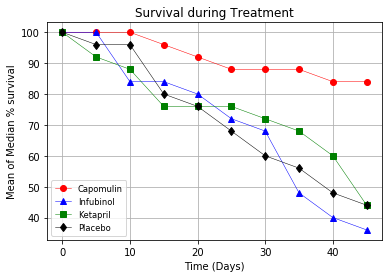

<Figure size 432x288 with 0 Axes>

In [23]:
# draw the plot
x = np.arange(0, 50, 5)

ax1= plt.plot(x, surv_df['Capomulin'], color="red", linewidth=0.5, marker='o', label="Capomulin" )
ax2= plt.plot(x, surv_df['Infubinol'], color="blue",linewidth=0.5, marker='^', label='Infubinol' )
ax3= plt.plot(x, surv_df['Ketapril'], color="green",linewidth=0.5, marker='s', label="Ketapril" )
ax4= plt.plot(x, surv_df['Placebo'], color="black",linewidth=0.5, marker='d',  label='Placebo' )

plt.title("Survival during Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Mean of Median % survival")

plt.legend(loc="lower left", fontsize="small", fancybox=True)
plt.grid()
plt.show()

plt.tight_layout()
plt.savefig("Survival during trt.png")

##  Tumor Response to Treatment

In [24]:
# prepare the means and sems for the study of Tumor volume change 
m1_df = df.groupby(["Drug",'t_point'])['tum_vol'].mean()
m1_df = m1_df.to_frame(name=None) # change to the dataframe
vm_df  = m1_df.unstack('Drug').loc[:,'tum_vol']

sem1_df = df.groupby(["Drug",'t_point'])['tum_vol'].sem()
sem1_df = sem1_df.to_frame(name=None) # change to the dataframe
vsem_df  = sem1_df.unstack('Drug').loc[:,'tum_vol']

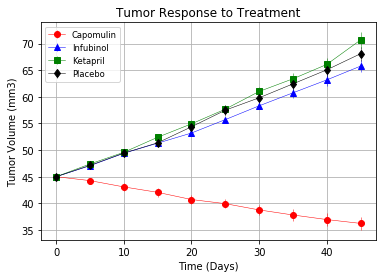

<Figure size 432x288 with 0 Axes>

In [25]:
# plot the graph
x = np.arange(0, 50, 5)

ax1= plt.errorbar(x, vm_df['Capomulin'],yerr=vsem_df['Capomulin'], color="red", linewidth=0.5, marker='o' )
ax2= plt.errorbar(x, vm_df['Infubinol'],yerr=vsem_df['Infubinol'], color="blue",linewidth=0.5, marker='^')
ax3= plt.errorbar(x, vm_df['Ketapril'], yerr=vsem_df['Ketapril'], color="green",linewidth=0.5, marker='s' )
ax4= plt.errorbar(x, vm_df['Placebo'],  yerr=vsem_df['Placebo'], color="black",linewidth=0.5, marker='d' )

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.legend(loc="upper left", fontsize="small", fancybox=True)
plt.grid()
plt.show()

plt.tight_layout()
plt.savefig("Tumor response to trt.png")

##  Metastatic Response to Treatment

In [26]:
# prepare means & sems for the study of  M-sites
m2_df = df.groupby(["Drug",'t_point'])['m_sites'].mean()
m2_df = m2_df.to_frame(name=None) # change to the dataframe
met_df= m2_df.unstack('Drug').loc[:,'m_sites']

sem2_df = df.groupby(["Drug",'t_point'])['m_sites'].sem()
sem2_df = sem2_df.to_frame(name=None) # change to the dataframe
metsem_df  = sem2_df.unstack('Drug').loc[:,'m_sites']

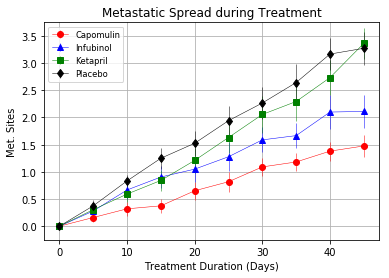

<Figure size 432x288 with 0 Axes>

In [27]:
# draw the plot
x = np.arange(0, 50, 5)

ax1= plt.errorbar(x, met_df['Capomulin'],yerr=metsem_df['Capomulin'], color="red",  linewidth=0.5, marker='o' )
ax2= plt.errorbar(x, met_df['Infubinol'],yerr=metsem_df['Infubinol'], color="blue", linewidth=0.5, marker='^')
ax3= plt.errorbar(x, met_df['Ketapril'], yerr=metsem_df['Ketapril'],  color="green",linewidth=0.5, marker='s')
ax4= plt.errorbar(x, met_df['Placebo'],  yerr=metsem_df['Placebo'],   color="black",linewidth=0.5, marker='d' )

plt.ylim(-0.25, 3.75)

plt.title("Metastatic Spread during Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")

plt.legend(loc="upper left", fontsize="small", fancybox=True)
plt.grid()
plt.show()

plt.tight_layout()
plt.savefig("Met.Spread during trt.png")

##  Tumor Change Over 45 Day Treatment

In [33]:
# prepare the dataset by calculating the total volume change of tumor
t_df =((vm_df.iloc[9,:]-vm_df.iloc[0,:])/vm_df.iloc[0,:])*100
t_df =t_df.to_frame(name='% tot_change') # change to the dataframe

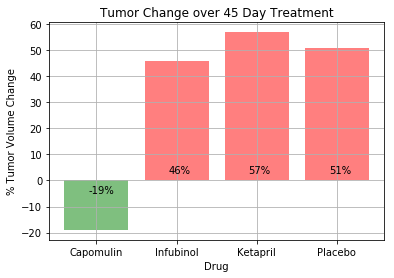

<Figure size 432x288 with 0 Axes>

In [34]:
# Draw bar charts
yv=t_df['% tot_change'].astype(int)
xv = np.arange(len(yv))
t_df['positive'] = t_df['% tot_change'] > 0
plt.bar(xv, yv, alpha=0.5,color=t_df.positive.map({True: 'r', False: 'g'}), align="center")

# write a % text inside the bar graphs
plt.text(s=str(yv[0])+"%",x=-0.1,y=-5,color="black")
for i in range(1,4):
    plt.text(s=str(yv[i])+"%",x=i-0.1,y=3,color="black")

# labelling
Drug = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
x_ticks=[value for value in xv]
plt.xticks(x_ticks, Drug)

plt.title("Tumor Change over 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
plt.grid()
plt.show()

plt.tight_layout()
plt.savefig("bar_chart_tumor change over trt.png")